In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import statsmodels.api as sm
import scipy.stats as sps

In [7]:
power = 2 
n = 2**power

ticker ='BTC-USD'
start = '2018-01-01'
end = '2022-05-22'

# raw_data = yf.download(ticker, start, end)['Close']
# prices = np.array(raw_data)[1:]/np.array(raw_data)[:-1] - 1

In [8]:
#downloading data
raw_data = yf.download(ticker, start, end)['Close']
prices = np.array(raw_data)[1:]
returns = np.array(raw_data)[1:]/np.array(raw_data)[:-1] - 1

[*********************100%***********************]  1 of 1 completed


In [9]:
raw_data


Date
2017-12-31    14156.400391
2018-01-01    13657.200195
2018-01-02    14982.099609
2018-01-03    15201.000000
2018-01-04    15599.200195
                  ...     
2022-05-17    30425.857422
2022-05-18    28720.271484
2022-05-19    30314.333984
2022-05-20    29200.740234
2022-05-21    29432.226562
Name: Close, Length: 1603, dtype: float64

In [10]:
#initialising arrays
hursts = np.array([])
tstats = np.array([])
pvalues = np.array([])

In [24]:
#calculating the rolling Hurst exponent
for t in np.arange(n,len(returns)+1):
    #specifying the subsample
    data = returns[t-n:t]
    X = np.arange(2, power+1)
    Y = np.array([])
    for p in X:
        m = 2**p
        s = 2**(power-p)
        rs_array = np.array([])
        #moving across subsamples
        for i in np.arange(0,s):
            subsample = data[i*m:(i+1)*m]
            mean = np.average(subsample)
            deviate = np.cumsum(subsample-mean)
            difference = max(deviate) - min(deviate)
            stdev = np.std(subsample)
            rescaled_range = difference/stdev
            rs_array = np.append(rs_array, rescaled_range)
        #calculating the log2 of average rescaled range
        Y = np.append(Y, np.log2(np.average(rs_array)))
    reg = sm.OLS(Y, sm.add_constant(X))
    res = reg.fit()
    hurst = res.params[1]
    tstat = (res.params[1]-0.5)/res.bse[1]
    pvalue = 2*(1 - sps.t.cdf(abs(tstat),res.df_resid))
    hursts = np.append(hursts, hurst)
    tstats = np.append(tstats, tstat)
    pvalues = np.append(pvalues, pvalue)


IndexError: index 1 is out of bounds for axis 0 with size 1

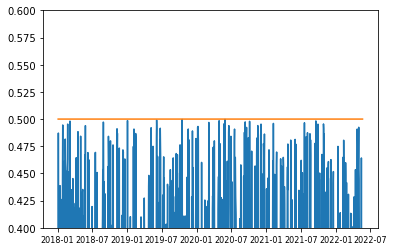

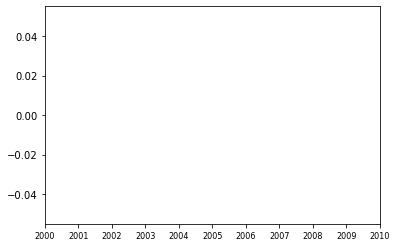

In [23]:
#visualising the Hurst exponent
plt.figure(1)
plt.rc('xtick',labelsize = 8)
plt.ylim(0.4,0.6)
plt.plot(raw_data.index[n:],hursts)
plt.plot(raw_data.index[n:],np.ones(len(hursts))*0.5)
plt.show()
#visualising the t-stat and critical values
plt.figure(2)
plt.rc('xtick',labelsize = 8)
plt.plot(raw_data.index[n:],tstats)
plt.plot(raw_data.index[n:],np.ones(len(tstats))*sps.t.ppf(0.005,res.df_resid))
plt.plot(raw_data.index[n:],np.ones(len(tstats))*sps.t.ppf(0.995,res.df_resid))
plt.show()

In [19]:
res.params


array([8.76428571])